In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [ ]:
ls

'My Drive'/


In [ ]:
cd My\ Drive

/gdrive/My Drive


In [ ]:
ls


 4thSem_payment1.pdf
 categories.json
'Colab Notebooks'/
 crop.h5
 crop_weights.h5
 Disease_predictor.h5
 Disease_Predictor.json
 Disease_predictor_new.h5
 Disease_Predictor_new.json
 Dissertation.docx
'[FTUForum.com] [UDEMY] The Complete Android Masterclass Learn Android From Scratch [FTU].zip (Unzipped Files)'/
 genetic_algorithm.py
'Getting started.pdf'
 grape_test_image.JPG
'HR-19-0609-Abhishek Kumar.pdf'
 NewPlantDiseasesDatasetAugmented/
 output.tflite
 Pic_under20.jpg
 PlantDiseaseDetection_AlexNet.ipynb
 plants1_checkpoint.pth
 PlantVillage-Dataset/
 Resume.pdf
 settings.xml
 Study_Material/
 tamoto_test.jpg
 testimg1.jpg
 testimg2.jpg
 testimg3.jpg
 Treatment/


In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.layers import Dense,Dropout,Flatten
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [ ]:
train_dataset_dir = 'NewPlantDiseasesDatasetAugmented/train/'
test_dataset_dir = 'NewPlantDiseasesDatasetAugmented/valid/'

In [ ]:
def get_All_files(filedir):
  if not os.path.exists(filedir):
    return 0
  total_count=0
  for path_current,dirs,files in os.walk(filedir):
    for i in dirs:
      total_count+= len(glob.glob(os.path.join(path_current, i+"/*")))
  return total_count

In [ ]:
train_data_samples = get_All_files(train_dataset_dir)
number_of_classes = len(glob.glob(train_dataset_dir+"/*"))
test_data_samples = get_All_files(test_dataset_dir)
print("Dataset contains Total "+str (number_of_classes)+ " different Classes")
print("Training Dataset contains Total of "+ str(train_data_samples)+ " Train images")
print("Testing Dataset contains Total of "+ str(test_data_samples)+ " Test images")

Dataset contains Total 38 different Classes
Training Dataset contains Total of 67799 Train images
Testing Dataset contains Total of 16945 Test images


In [ ]:
training_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
testing_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [ ]:
image_width,image_height =224,224
input_shape=(image_width,image_height,3)
batch_size =32

train_generator =training_datagen.flow_from_directory(train_dataset_dir,
                                                   target_size=(image_width,image_height),
                                                   batch_size=batch_size)
test_generator=testing_datagen.flow_from_directory(test_dataset_dir,shuffle=True,
                                                   target_size=(image_width,image_height),
                                                   batch_size=batch_size)

Found 67799 images belonging to 38 classes.
Found 16945 images belonging to 38 classes.


In [ ]:
print("Dataset contains following plant classes")
train_generator.class_indices  #show the data index


Dataset contains following plant classes


{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
p_model = Sequential()
p_model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
p_model.add(MaxPooling2D(pool_size=(3, 3)))
p_model.add(Conv2D(32, (3, 3),activation='relu'))
p_model.add(MaxPooling2D(pool_size=(2, 2)))
p_model.add(Conv2D(64, (3, 3),activation='relu'))
p_model.add(MaxPooling2D(pool_size=(2, 2)))   
p_model.add(Flatten())
p_model.add(Dense(512,activation='relu'))
p_model.add(Dropout(0.25))
p_model.add(Dense(128,activation='relu'))          
p_model.add(Dense(number_of_classes,activation='softmax'))
p_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)            

In [ ]:
p_model_layers = [ layer.name for layer in p_model.layers]
print('Model containing following names of layers : ',p_model_layers)

Model containing following names of layers :  ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'flatten_1', 'dense_1', 'dropout_1', 'dense_2', 'dense_3']


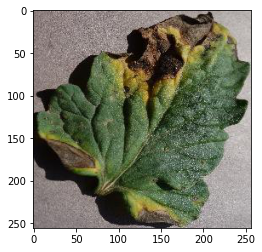

In [ ]:
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('tamoto_test.jpg')
plt.imshow(img1);

#Image preprocessing
img1 = image.load_img('tamoto_test.jpg', target_size=(224, 224))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
from keras.models import Model
conv2d_1_layer_output = Model(inputs=p_model.input, outputs=p_model.get_layer('conv2d_1').output)
max_pooling2d_1_layer_output = Model(inputs=p_model.input,outputs=p_model.get_layer('max_pooling2d_1').output)
conv2d_2_layer_output = Model(inputs=p_model.input,outputs=p_model.get_layer('conv2d_2').output)
max_pooling2d_2_layer_output = Model(inputs=p_model.input,outputs=p_model.get_layer('max_pooling2d_2').output)
conv2d_3_layer_output = Model(inputs=p_model.input,outputs=p_model.get_layer('conv2d_3').output)
max_pooling2d_3_layer_output = Model(inputs=p_model.input,outputs=p_model.get_layer('max_pooling2d_3').output)
flatten_1_layer_output = Model(inputs=p_model.input,outputs=p_model.get_layer('flatten_1').output)
conv2d_1_layer_features = conv2d_1_layer_output.predict(img)
max_pooling2d_1_layer_features = max_pooling2d_1_layer_output.predict(img)
conv2d_2_layer_features = conv2d_2_layer_output.predict(img)
max_pooling2d_2_layer_features = max_pooling2d_2_layer_output.predict(img)
conv2d_3_layer_features = conv2d_3_layer_output.predict(img)
max_pooling2d_3_layer_features = max_pooling2d_3_layer_output.predict(img)
flatten_1_layer_features = flatten_1_layer_output.predict(img)

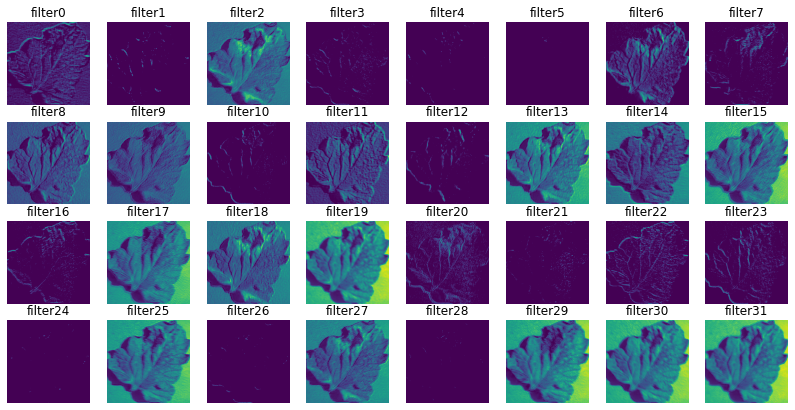

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_layer_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()
#fig.savefig('Output/output_1.jpg',dpi=500)

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_layer_features[0, :, :, i], cmap='viridis')
plt.show()
fig.savefig('Output/output_2.jpg',dpi=500)

NameError: ignored

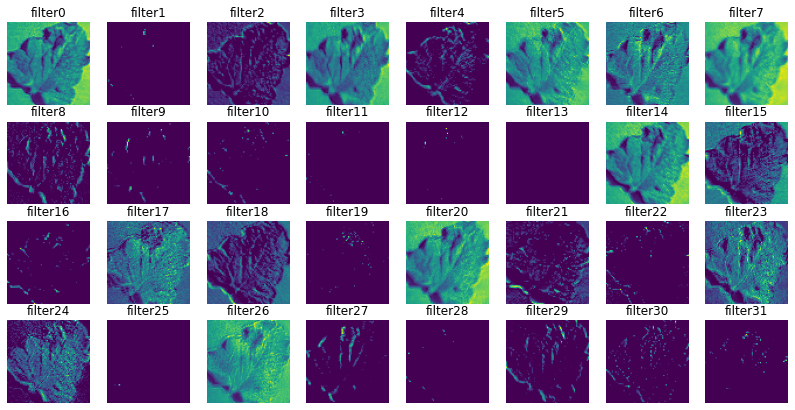

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns,row = 8,4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_layer_features[0, :, :, i], cmap='viridis')
plt.show()
fig.savefig('Output/output_3.jpg',dpi=500)

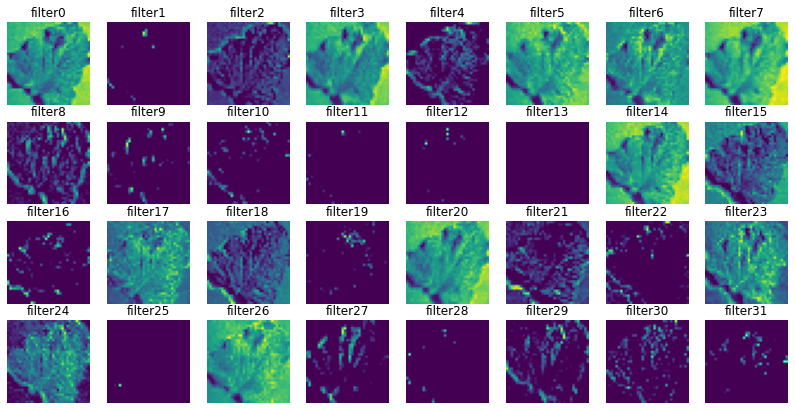

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns,rows = 8,4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_layer_features[0, :, :, i], cmap='viridis') 
plt.show()
fig.savefig('Output/output_4.jpg',dpi=500)

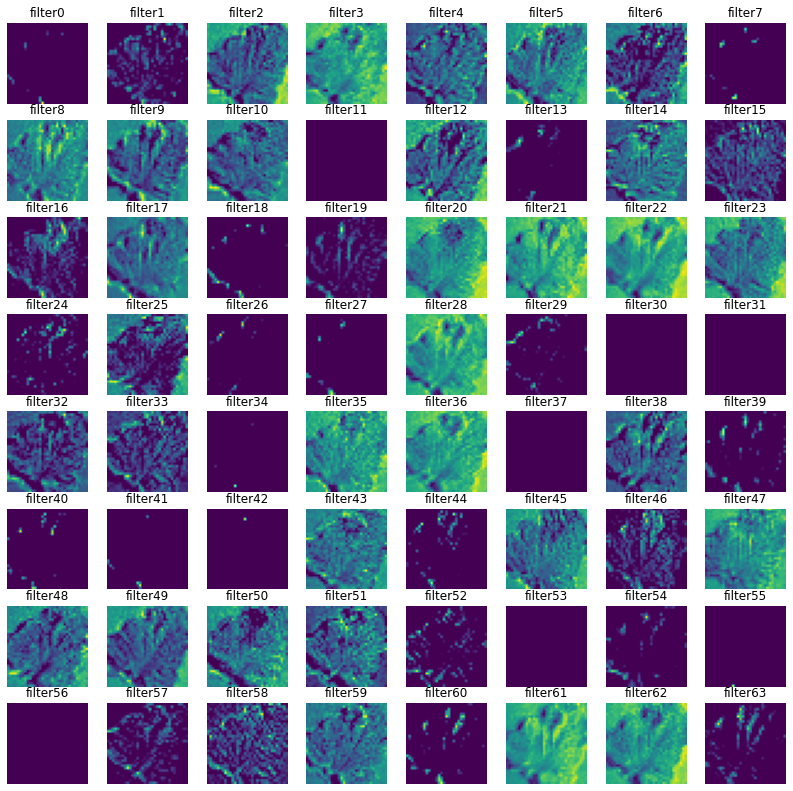

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns,rows =8, 8

for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_layer_features[0, :, :, i], cmap='viridis')
plt.show()
fig.savefig('Output/output_5.jpg',dpi=500)

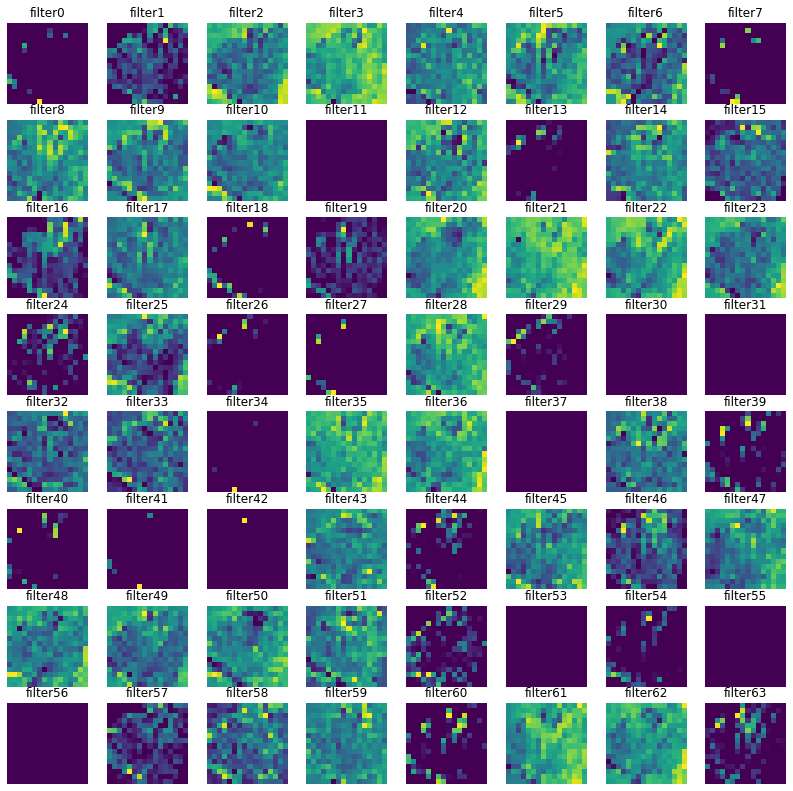

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns, rows = 8,8
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_layer_features[0, :, :, i],cmap='viridis')
plt.show()
fig.savefig('Output/output_6.jpg',dpi=500)

In [ ]:
validation_generator = training_datagen.flow_from_directory(
    train_dataset_dir, # same directory as training data
    target_size=(image_height, image_width),
    batch_size=batch_size)

Found 67799 images belonging to 38 classes.


In [ ]:
from keras.models import load_model
opt=keras.optimizers.Adam(lr=0.001)
p_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=p_model.fit_generator(train_generator,
                          nb_epoch=10,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          nb_val_samples= validation_generator.samples// batch_size,verbose=1)

p_model.save('crop.h5')
# Save model weights.
p_model.save_weights('crop_weights.h5')
print("model is trained and saved in disk")

Epoch 1/10
1070/1070 [==============================] - 799s 746ms/step - loss: 0.2418 - acc: 0.9216 - val_loss: 0.2042 - val_acc: 0.9331
Epoch 2/10
1070/1070 [==============================] - 792s 740ms/step - loss: 0.2112 - acc: 0.9316 - val_loss: 0.1508 - val_acc: 0.9504
Epoch 3/10
1070/1070 [==============================] - 788s 737ms/step - loss: 0.1936 - acc: 0.9387 - val_loss: 0.1234 - val_acc: 0.9590
Epoch 4/10
1070/1070 [==============================] - 789s 737ms/step - loss: 0.1788 - acc: 0.9421 - val_loss: 0.1137 - val_acc: 0.9648
Epoch 5/10
1070/1070 [==============================] - 790s 738ms/step - loss: 0.1605 - acc: 0.9482 - val_loss: 0.0793 - val_acc: 0.9740
Epoch 6/10
1070/1070 [==============================] - 788s 737ms/step - loss: 0.1545 - acc: 0.9497 - val_loss: 0.0970 - val_acc: 0.9689
Epoch 7/10
1070/1070 [==============================] - 791s 739ms/step - loss: 0.1449 - acc: 0.9533 - val_loss: 0.0541 - val_acc: 0.9824
Epoch 8/10
1070/1070 [============

In [ ]:
from keras.models import load_model
model=load_model('crop.h5')
acc = train.history['acc']
val_acc = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

NameError: ignored

In [ ]:

# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('crop.h5')
# Save model weights.
model.save_weights('crop_weights.h5')

Using TensorFlow backend.


NameError: ignored

In [ ]:
ls


 4thSem_payment1.pdf
'Colab Notebooks'/
 crop.h5
 crop_weights.h5
 Disease_predictor.h5
 Disease_Predictor.json
 Disease_predictor_new.h5
 Disease_Predictor_new.json
'[FTUForum.com] [UDEMY] The Complete Android Masterclass Learn Android From Scratch [FTU].zip (Unzipped Files)'/
'Getting started.pdf'
 output.tflite
 PlantVillage-Dataset/
 Resume.pdf
 settings.xml
 Study_Material/
 tamoto_test.jpg
 testimg1.jpg
 testimg2.jpg


In [ ]:
from keras.models import load_model
model=load_model('crop.h5')

Classes = ["Apple___Apple_scab","Apple___Black_rot","Apple___Cedar_apple_rust","Apple___healthy","Blueberry___healthy",
"Cherry_(including_sour)___Powdery_mildew","Cherry_(including_sour)___healthy","Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
"Corn_(maize)___Common_rust_","Corn_(maize)___Northern_Leaf_Blight","Corn_(maize)___healthy","Grape___Black_rot","Grape___Esca_(Black_Measles)",
"Grape___Leaf_blight_(Isariopsis_Leaf_Spot)","Grape___healthy","Orange___Haunglongbing_(Citrus_greening)","Peach___Bacterial_spot","Peach___healthy",
"Pepper,_bell___Bacterial_spot","Pepper,_bell___healthy","Potato___Early_blight","Potato___Late_blight","Potato___healthy","Raspberry___healthy",
"Soybean___healthy","Squash___Powdery_mildew","Strawberry___Leaf_scorch","Strawberry___healthy","Tomato___Bacterial_spot","Tomato___Early_blight",
"Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot",
"Tomato___Tomato_Yellow_Leaf_Curl_Virus","Tomato___Tomato_mosaic_virus","Tomato___healthy"]

Disease
[10]
Corn_(maize)___healthy
This is a healthy corn leaf. No Treatment required.



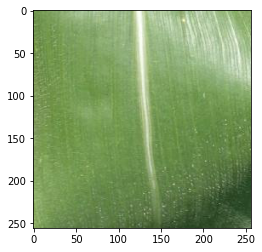

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
img_width=224
img_height=224

def prepare(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('testimg3.jpg')])
disease=image.load_img('testimg3.jpg')
plt.imshow(disease)
print('Disease')
print(result)
print (Classes[int(result)])

file1 = open('Treatment/'+Classes[int(result)]+'.txt',"r+")  

print(file1.read())
print()
file1.close()

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model_file('crop.h5') 
tfmodel = converter.convert() 
open ("output.tflite" , "wb") .write(tfmodel)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 12 variables.
INFO:tensorflow:Converted 12 variables to const ops.


33959324